## Chapter 8 Power Transforms

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import boxcox

In [32]:
# Load Airline Passengers Dataset
series = pd.read_csv('data/airline-passengers.csv', index_col=0, parse_dates=True)
series.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [33]:
df = pd.read_csv('data/airline-passengers.csv', parse_dates=True)
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


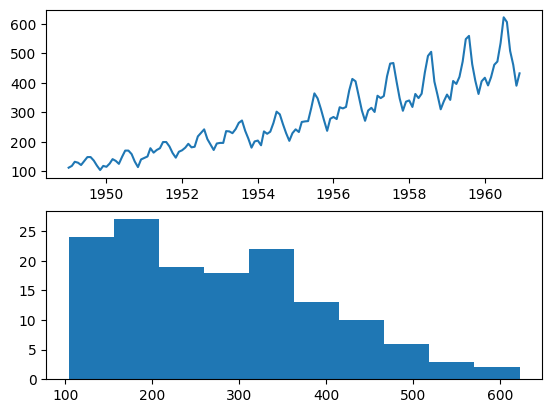

In [34]:
# plot a time series
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(series)
# histogram
plt.subplot(212)
plt.hist(series)
plt.show()

The dataset is non-stationary, meaning that the mean and the variance of the observations change over time. As it is shown in the plot that there is both an increasing trend and a seasonality component. In addition, the amount of change, or the variance, is increasing with time.

#### Square Root Transform

A time series that has a quadratic growth trend can be made linear by taking the square root.

Consider a series of the numbers 1 to 99 squared. The line plot of this series will show a quadratic growth trend and a histogram of the values will show an exponential distribution with a long tail.

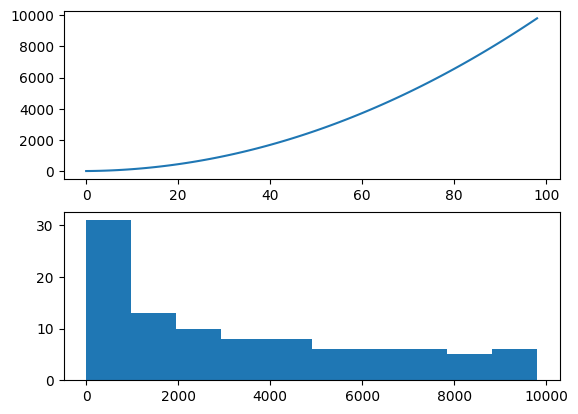

In [35]:
# contrive a quadratic time series
series2 = [i**2 for i in range(1, 100)]
plt.figure(2)
# line plot
plt.subplot(211)
plt.plot(series2)
# histogram
plt.subplot(212)
plt.hist(series2)
plt.show()

If you see a structure like this in your own time series, you may have a quadratic growth trend. This can be removed or made linear by taking the inverse operation of the squaring procedure, which is the square root.

Because the example is perfectly quadratic, we would expect the line plot of the transformed data to show a straight line. Because the source of the squared series is linear, we would expect the histogram to show a uniform distribution. The example below performs a sqrt() transform on the time series and plots the result.

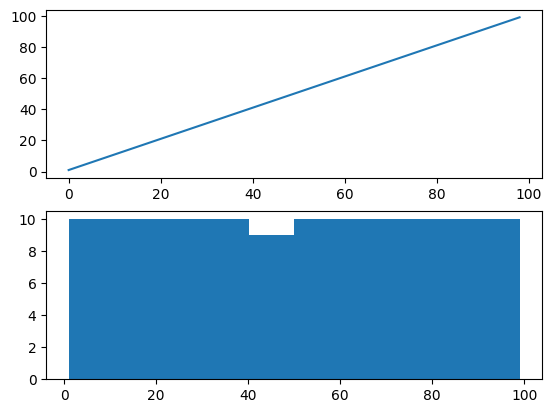

In [36]:
# square root transform a contrived quadratic time series
series3 = [i**2 for i in range(1, 100)]
# sqrt transform
series3 = np.sqrt(series3)
plt.figure(3)
# line plot
plt.subplot(211)
plt.plot(series3)
# histogram
plt.subplot(212)
plt.hist(series3)
plt.show()

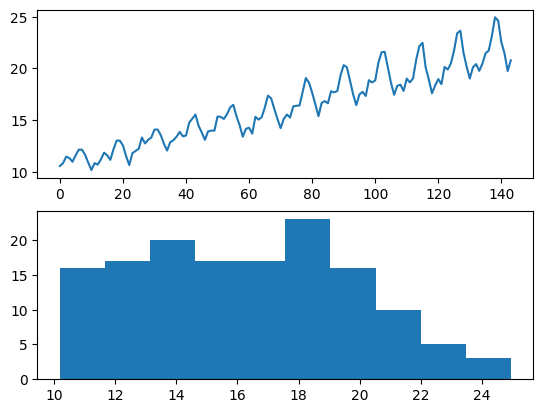

In [37]:
# square root transform a time series
df['Passengers_sqrt'] = np.sqrt(df['Passengers'])
plt.figure(4)
# line plot
plt.subplot(211)
plt.plot(df['Passengers_sqrt'])
# histogram
plt.subplot(212)
plt.hist(df['Passengers_sqrt'])
plt.show()

We can see that the trend was reduced, but was not removed. The line plot still shows an increasing variance from cycle to cycle. The histogram still shows a long tail to the right of the distribution, suggesting an exponential or long-tail distribution.

#### Log Transform

Time series with an exponential distribution can be made linear by taking the logarithm of the values.

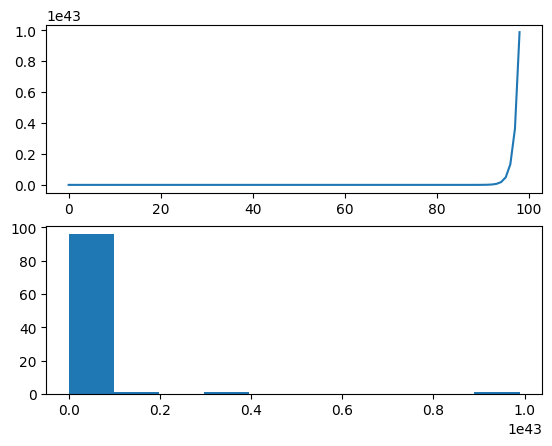

In [38]:
# create and plot an exponential time series
series4 = [exp(i) for i in range(1, 100)]
plt.figure(5)
# line plot
plt.subplot(211)
plt.plot(series4)
# histogram
plt.subplot(212)
plt.hist(series4)
plt.show()

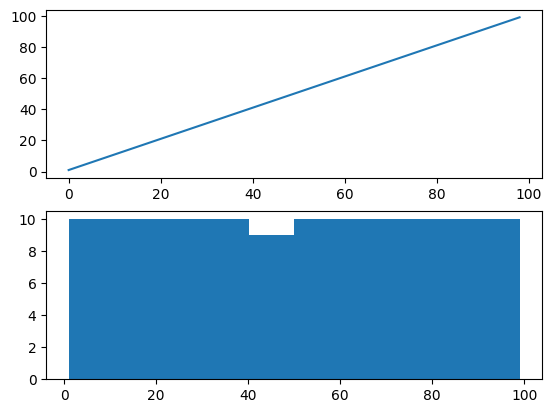

In [39]:
# log transform a contrived exponential time series
series5 = [exp(i) for i in range(1, 100)]
# log transform
series5 = np.log(series5)
plt.figure(6)
# line plot
plt.subplot(211)
plt.plot(series5)
# histogram
plt.subplot(212)
plt.hist(series5)
plt.show()

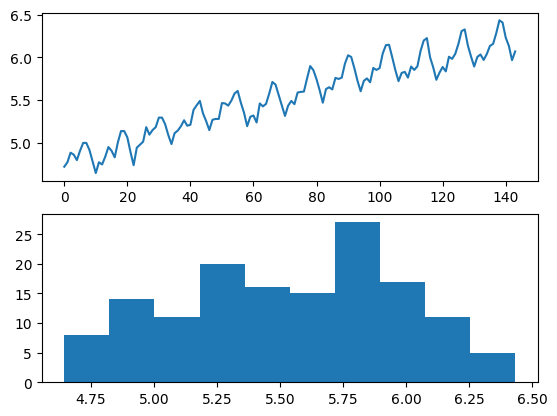

In [41]:
# log transform airline dataset
df['Passengers_log'] = np.log(df['Passengers'])
plt.figure(7)
# line plot
plt.subplot(211)
plt.plot(df['Passengers_log'])
# histogram
plt.subplot(212)
plt.hist(df['Passengers_log'])
plt.show()

Running the example results in a trend that does look a lot more linear than the square root transform above. The line plot shows a seemingly linear growth and variance. The histogram also shows a more uniform or squashed Gaussian-like distribution of observations.

og transforms are popular with time series data as they are effective at removing exponential variance. It is important to note that this operation assumes values are positive and non-zero. It is common to transform observations by adding a fixed constant to ensure all input values meet this requirement. For example: transform=log(constant+x).


#### Box-Cox Transform

The square root transform and log transform belong to a class of transforms called power transforms. The Box-Cox transform2 is a configurable data transform method that supports both square root and log transform, as well as a suite of related transforms.

More than that, it can be configured to evaluate a suite of transforms automatically and select a best fit.

The scipy.stats library provides an implementation of the Box-Cox transform. The boxcox() function3 takes an argument, called lmbda, that controls the type of transform to perform. Below are some common values for lmbda:
- lmbda = -1.0 is a reciprocal transform.
- lmbda = -0.5 is a reciprocal square root transform. 
- lmbda = 0.0 is a log transform.
- lmbda = 0.5 is a square root transform.
- lmbda = 1.0 is no transform.


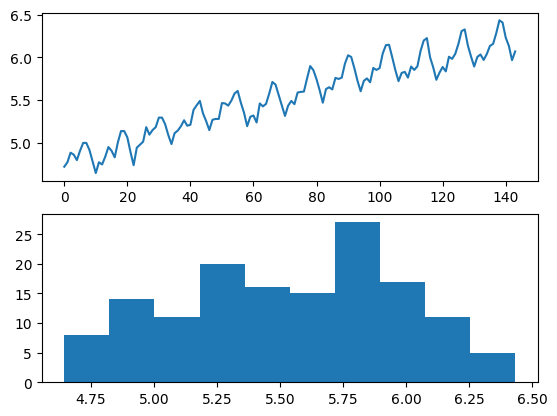

In [47]:
# manually box-cox transform a time series
df['Passengers_boxcox_log'] = boxcox(df['Passengers'], lmbda=0.0) # log transform
plt.figure(8)
# line plot
plt.subplot(211)
plt.plot(df['Passengers_boxcox_log'])
# histogram
plt.subplot(212)
plt.hist(df['Passengers_boxcox_log'])
plt.show()

Lambda: 0.148023


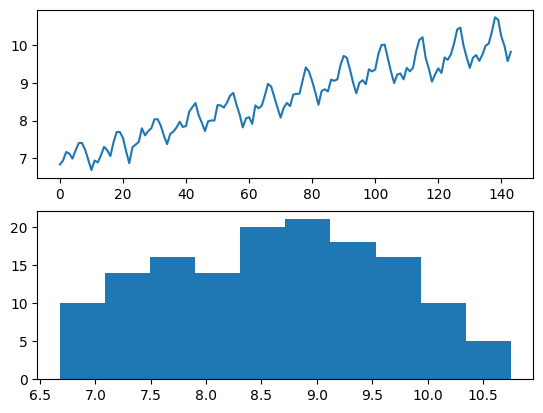

In [52]:
# automatically box-cox transform a time series
df['Passengers_boxcox'], lam = boxcox(df['Passengers'])
print(f'Lambda: {lam:.6f}')
plt.figure(9)
# line plot
plt.subplot(211)
plt.plot(df['Passengers_boxcox'])
# histogram
plt.subplot(212)
plt.hist(df['Passengers_boxcox'])
plt.show()